---- Logistic Regression ----
Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[89 16]
 [21 53]]


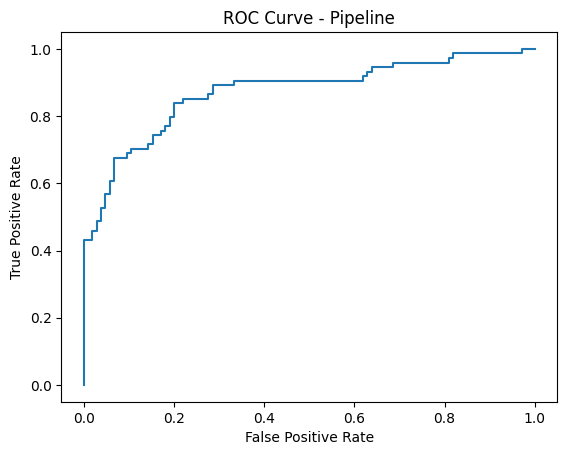

---- KNN ----
Accuracy: 0.5921787709497207
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.69       105
           1       0.51      0.31      0.39        74

    accuracy                           0.59       179
   macro avg       0.57      0.55      0.54       179
weighted avg       0.57      0.59      0.57       179

Confusion Matrix:
 [[83 22]
 [51 23]]


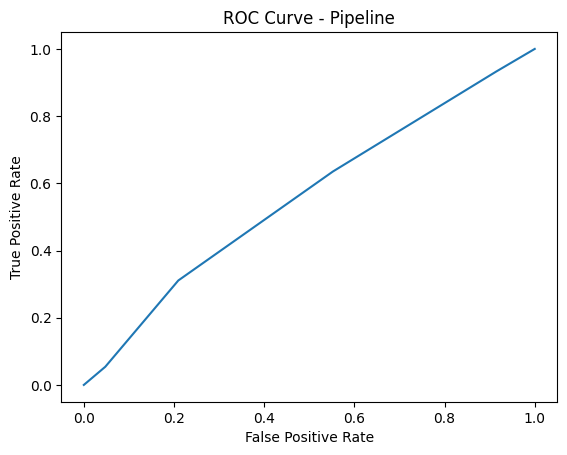

---- SVC ----
Accuracy: 0.5865921787709497
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       1.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.79      0.50      0.37       179
weighted avg       0.76      0.59      0.43       179

Confusion Matrix:
 [[105   0]
 [ 74   0]]


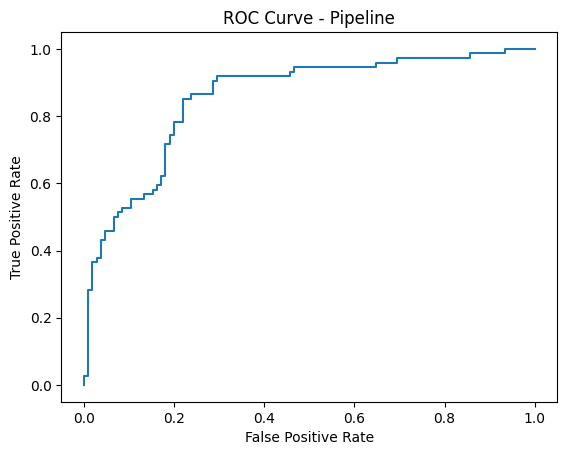

---- Decision Tree ----
Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[92 13]
 [24 50]]


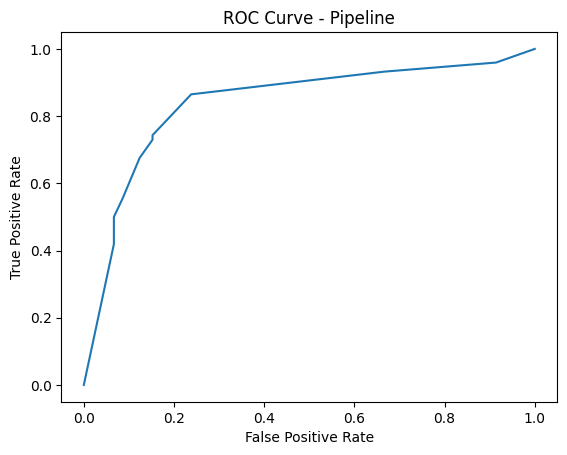

---- Random Forest ----
Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
 [[93 12]
 [21 53]]


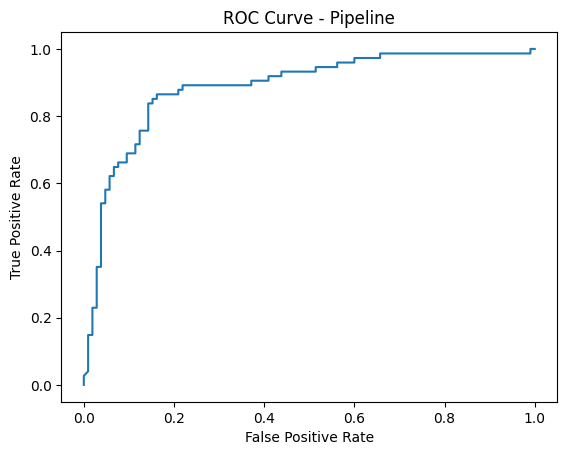

In [6]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('/workspace/dataset.csv')

# Mostrar las primeras filas del dataset para entender su estructura
df.head()

# Preprocesamiento de datos

# Seleccionar las columnas relevantes
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']  # La columna objetivo es 'Survived'

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Crear pipelines de preprocesamiento

# Definir las características numéricas y categóricas
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Preprocesar características numéricas: imputación y escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())],
    memory=None  # Especificar memory=None para evitar la advertencia
)

# Preprocesar características categóricas: imputación y codificación One-Hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))],
    memory=None  # Especificar memory=None para evitar la advertencia
)

# Combinar el preprocesamiento numérico y categórico
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# Función para evaluar los modelos
def evaluate_model(model, x_test, y_test):  
    y_pred = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Modificar el reporte de clasificación para controlar el error
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Evitar la advertencia de precision ill-defined
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Curva ROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'ROC curve ({model.__class__.__name__})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model.__class__.__name__}')
        plt.show()


# Lista de modelos con parámetros explícitos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Especificar random_state
    "KNN": KNeighborsClassifier(n_neighbors=5),  # Especificar el número de vecinos
    "SVC": SVC(probability=True, random_state=42),  # Especificar random_state
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),  # Especificar random_state y max_depth
    "Random Forest": RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        criterion='gini', 
        max_depth=10,  # Limitar la profundidad del árbol
        min_samples_split=4,  # Número mínimo de muestras para dividir un nodo
        min_samples_leaf=1,  # Mínimo número de muestras por hoja
        max_features='sqrt'  # Selección de características
    )
}

# Entrenamiento y evaluación de los modelos sin caché
for name, model in models.items():
    print(f"---- {name} ----")
    
    # Crear un pipeline sin memoria cacheada
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)],
                   memory=None)  # Especificar memory=None para evitar la advertencia
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Evaluar el modelo
    evaluate_model(clf, X_test, y_test)
